In [29]:
import folium
import openrouteservice
from openrouteservice import convert
import math
import pandas as pd
import numpy as np
import decimal
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt
import requests
from IPython.display import display, clear_output
import random

In [2]:
file_path = "gurugram_data.csv"
data = pd.read_csv(file_path)

In [3]:
data.columns

Index(['id', 'latitude', 'longitude', 'nearest_node', 'degree'], dtype='object')

In [4]:
data.head()

,id,latitude,longitude,nearest_node,degree
0,node,28.461697,77.087018,249350111,4
1,node,28.536270,77.197371,250078367,4
2,node,28.450043,77.063861,9903240504,4
3,node,28.482711,77.107530,251691410,3
4,node,28.491757,77.090856,5228569733,3


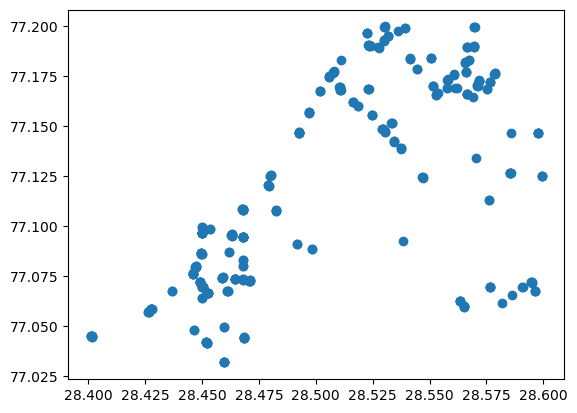

In [5]:
x , y  = data['latitude'] , data['longitude']

plt.scatter(x, y)
plt.show()

In [6]:
coords_path = [[lon, lat] for lon, lat in zip(data['longitude'], data['latitude'])]
n = folium.Map(location=list(reversed([77.09, 28.5])), tiles="cartodbpositron", zoom_start=12)
for coord in coords_path:
    folium.Marker(location=list(reversed(coord))).add_to(n)
n

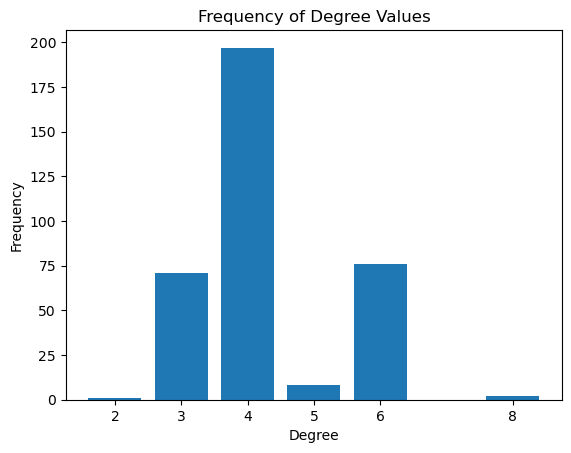

In [7]:
degree_counts = data['degree'].value_counts()

plt.bar(degree_counts.index, degree_counts.values)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Frequency of Degree Values')
plt.xticks(degree_counts.index)

plt.show()

In [8]:
filtered_df = data[data['degree'].isin([5, 6, 8])]
filtered_df

,id,latitude,longitude,nearest_node,degree
17,node,28.458669,77.074044,9501049071,5
24,node,28.585618,77.146488,9794116732,6
30,node,28.575097,77.168516,282138885,6
41,node,28.597626,77.146186,11780481158,5
42,node,28.597724,77.146207,11780481159,6
...,...,...,...,...,...
341,node,28.450235,77.069544,9903465142,6
342,node,28.449102,77.071824,3204210851,6
343,node,28.449283,77.071733,9903465132,6
344,node,28.449296,77.071866,9903465132,6


In [9]:
map_center = [filtered_df['latitude'].mean(), filtered_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

for idx, row in filtered_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Node ID: {row['id']}<br>Degree: {row['degree']}",
        icon=folium.Icon(color='red' if row['degree'] == 8 else 'orange' if row['degree'] == 6 else 'blue')
    ).add_to(m)

m.save('map.html')

# Display map in a Jupyter notebook
m


In [13]:
client = openrouteservice.Client(key='5b3ce3597851110001cf62487dab724e881e4bfeab36d60cd37e61f6')

def get_address(row):
    try:
        coordinates = (row['longitude'], row['latitude'])
        result = client.pelias_reverse(point=coordinates)
        address = result['features'][0]['properties']['label']
        return address
    except Exception as e:
        return str(e)

data['address'] = data.apply(get_address, axis=1)

print("Addresses have been added to the dataset.")

C:\Users\shiva\anaconda3\Lib\site-packages\openrouteservice\client.py:211: UserWarning: Rate limit exceeded. Retrying for the 1st time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
C:\Users\shiva\anaconda3\Lib\site-packages\openrouteservice\client.py:211: UserWarning: Rate limit exceeded. Retrying for the 2nd time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,


Addresses have been added to the dataset.


In [14]:
data

,id,latitude,longitude,nearest_node,degree,address
0,node,28.461697,77.087018,249350111,4,"Guardian Pharmacy, Gurugram, HR, India"
1,node,28.536270,77.197371,250078367,4,"Krishna Super Marché 37, Delhi, India"
2,node,28.450043,77.063861,9903240504,4,"Vista Wood, Gurugram, HR, India"
3,node,28.482711,77.107530,251691410,3,"Moulsari Road, Gurugram, HR, India"
4,node,28.491757,77.090856,5228569733,3,"Royal Bank of Scotland, Gurugram, HR, India"
...,...,...,...,...,...,...
350,node,28.458890,77.073936,266595943,4,"August Kranti Marg, Gurugram, HR, India"
351,node,28.471020,77.072484,1987622348,4,"August Kranti Marg, Gurugram, HR, India"
352,node,28.498291,77.088351,4135550240,4,"DLF Cyber City, Gurugram, HR, India"
353,node,28.471079,77.072706,6112563505,3,"August Kranti Marg, Gurugram, HR, India"


In [26]:
min_latitude = 28.4291
max_latitude = 28.4592
min_longitude = 77.0367
max_longitude = 77.0725

# Filter the rows within the bounding box
path_points = data[
    (data['latitude'] >= min_latitude) &
    (data['latitude'] <= max_latitude) &
    (data['longitude'] >= min_longitude) &
    (data['longitude'] <= max_longitude)
]


In [27]:
coords_path = [[lon, lat] for lon, lat in zip(path_points['longitude'], path_points['latitude'])]
n = folium.Map(location=list(reversed([77.049466, 28.808122])), tiles="cartodbpositron", zoom_start=12)
for coord in coords_path:
    folium.Marker(location=list(reversed(coord))).add_to(n)
n

In [35]:
api_key = '5b3ce3597851110001cf62487dab724e881e4bfeab36d60cd37e61f6'
client = openrouteservice.Client(key=api_key)

start_coords = (28.4291, 77.0984433)
end_coords = (28.4592, 77.049466)

route = client.directions(coordinates=[(start_coords[1], start_coords[0]), (end_coords[1], end_coords[0])], profile='driving-car', format='geojson')
route_coords = [(coord[1], coord[0]) for coord in route['features'][0]['geometry']['coordinates']]
car_map = folium.Map(location=[start_coords[0], start_coords[1]], zoom_start=14)
folium.GeoJson(route, name='route').add_to(car_map)

folium.Marker(
    location=[start_coords[0], start_coords[1]],
    popup='Start',
    icon=folium.Icon(color='green')
).add_to(car_map)

folium.Marker(
    location=[end_coords[0], end_coords[1]],
    popup='End',
    icon=folium.Icon(color='red')
).add_to(car_map)
coords_path = [[lon, lat] for lon, lat in zip(path_points['longitude'], path_points['latitude'])]

distance = route['features'][0]['properties']['segments'][0]['distance'] / 1000
duration = route['features'][0]['properties']['segments'][0]['duration'] / 60

folium.map.Marker(
    [start_coords[0], start_coords[1]],
    icon=folium.DivIcon(
        html=f'<div style="font-size: 16pt">Distance: {distance:.2f} km<br>Duration: {duration:.2f} min</div>'
    )
).add_to(car_map)


car_map.save('car_movement_directions_map.html')

display(car_map)


for i in range(len(route_coords)):
    current_coords = route_coords[i]
    clear_output(wait=True)
    car_map = folium.Map(location=current_coords, zoom_start=14)
    folium.GeoJson(route, name='route').add_to(car_map)
    folium.Marker(
        location=[start_coords[0], start_coords[1]],
        popup='Start',
        icon=folium.Icon(color='green')
    ).add_to(car_map)

    folium.Marker(
        location=[end_coords[0], end_coords[1]],
        popup='End',
        icon=folium.Icon(color='red')
    ).add_to(car_map)

    folium.PolyLine(locations=route_coords[:i+1], color='blue').add_to(car_map)

    speed_limit = random.uniform(35, 37)

    print(f'Current speed limit: {speed_limit:.2f} km/h')

    folium.Marker(
        location=current_coords,
        popup=f'Speed Limit: {speed_limit:.2f} km/h',
        icon=folium.Icon(color='red')
    ).add_to(car_map)

    # Display the map
    display(car_map)

    time.sleep(0.1)


Current speed limit: 35.58 km/h
